Scenario I with dataset Women

<b><span style="color:red;">Note importante: je pense pas avoir bien compris où était le bon moment pour faire handling multicolinéarité et outliers dans le livre de Montgomery explique pas si on doit les enlever direcetement et comment</span></b>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

Error importing in API mode: ImportError("dlopen(/Users/itdivisions/miniconda3/envs/mon_env/lib/python3.10/site-packages/_rinterface_cffi_api.abi3.so, 0x0002): symbol not found in flat namespace '_R_BaseEnv'")
Trying to import in ABI mode.


In [3]:
# import data set 
# Choose 33 for CRAN 


utils = importr('utils')
utils.install_packages('TH.data')

th_data = importr('TH.data')
ro.r('data("bodyfat")')
bodyfat = ro.r['bodyfat']

df = pandas2ri.rpy2py(bodyfat)
df.to_csv('bodyfat_women.csv', index=False)

--- SVP sélectionnez un miroir CRAN pour cette session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]                   2: Australia (Canberra) [https]   
 3: Australia (Melbourne 1) [https]   4: Australia (Melbourne 2) [https]
 5: Austria (Wien) [https]            6: Belgium (Brussels) [https]     
 7: Brazil (PR) [https]               8: Brazil (SP 1) [https]          
 9: Brazil (SP 2) [https]            10: Bulgaria [https]               
11: Canada (MB) [https]              12: Canada (ON 1) [https]          
13: Canada (ON 2) [https]            14: Chile (Santiago) [https]       
15: China (Beijing 1) [https]        16: China (Beijing 2) [https]      
17: China (Beijing 3) [https]        18: China (Hefei) [https]          
19: China (Hong Kong) [https]        20: China (Jinan) [https]          
21: China (Lanzhou) [https]          22: China (Nanjing) [https]        
23: China (Shanghai 2) [https]       24: China (Shenzhen) [https]       
25: China (Wuhan) [https]            26: Co

R callback write-console: essai de l'URL 'https://mirror.ibcp.fr/pub/CRAN/bin/macosx/big-sur-x86_64/contrib/4.5/TH.data_1.1-5.tgz'
  
R callback write-console: Content type 'application/x-gzip'  
R callback write-console:  length 8761256 bytes (8.4 MB)
  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console: =  
R callback write-console


Les packages binaires téléchargés sont dans
	/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T//RtmpTpbFay/downloaded_packages


R callback write-console: De plus :   
R callback write-console: Message d'avis :
  
R callback write-console: Dans doTryCatch(return(expr), name, parentenv, handler) :  
R callback write-console: 
   
R callback write-console:  impossible de charger l'objet partagé '/Library/Frameworks/R.framework/Resources/modules//R_X11.so' :
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 0x0006): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: <D875E327-716F-321C-8684-B35029F4C85E> /Library/Frameworks/R.framework/Versions/4.5-x86_64/Resources/modules/R_X11.so
  Reason: tried: '/opt/X11/lib/libSM.6.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/X11/lib/libSM.6.dylib' (no such file), '/opt/X11/lib/libSM.6.dylib' (no such file), '/usr/local/lib/libSM.6.dylib' (no such file), '/usr/lib/libSM.6.dylib' (no such file, not in dyld cache)
  


In [4]:
print(df.head())
print(df.info())

     age  DEXfat  waistcirc  hipcirc  elbowbreadth  kneebreadth  anthro3a  \
47  57.0   41.68      100.0    112.0           7.1          9.4      4.42   
48  65.0   43.29       99.5    116.5           6.5          8.9      4.63   
49  59.0   35.41       96.0    108.5           6.2          8.9      4.12   
50  58.0   22.79       72.0     96.5           6.1          9.2      4.03   
51  60.0   36.42       89.5    100.5           7.1         10.0      4.24   

    anthro3b  anthro3c  anthro4  
47      4.95      4.50     6.13  
48      5.01      4.48     6.37  
49      4.74      4.60     5.82  
50      4.48      3.91     5.66  
51      4.68      4.15     5.91  
<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, 47 to 117
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           71 non-null     float64
 1   DEXfat        71 non-null     float64
 2   waistcirc     71 non-null     float64
 3   hipcirc      

##### Now we are going to follow the STRATEGY FOR VARIABLE SELECTION AND MODEL BUILDING from the Montgomery et al book

### 1) Fit the largest model possible to the data 

In [5]:
# linear regression on all the data available 

X=df.drop('DEXfat',axis=1)
y=df['DEXfat']

# model
X_with_const = sm.add_constant(X) # to add intercept 
model_full = sm.OLS(y, X_with_const).fit() # use of sm to get a simple linear reg
print(model_full.summary())





                            OLS Regression Results                            
Dep. Variable:                 DEXfat   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sam, 31 jan 2026   Prob (F-statistic):           1.39e-30
Time:                        13:02:25   Log-Likelihood:                -179.71
No. Observations:                  71   AIC:                             379.4
Df Residuals:                      61   BIC:                             402.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -69.0283      7.517     -9.183   

### 2) Perform a thorough analysis of this model.

• What regressors seem important?

• Are there possible outliers?

• Is there a need to transform the response?

• Do any of the regressors need transformations?

<b><span style="color:red;">Note: potentiellement verifier avec un TA interpretation des plots pour être sures</span></b>


### 2.1 Residual Diagnostics

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

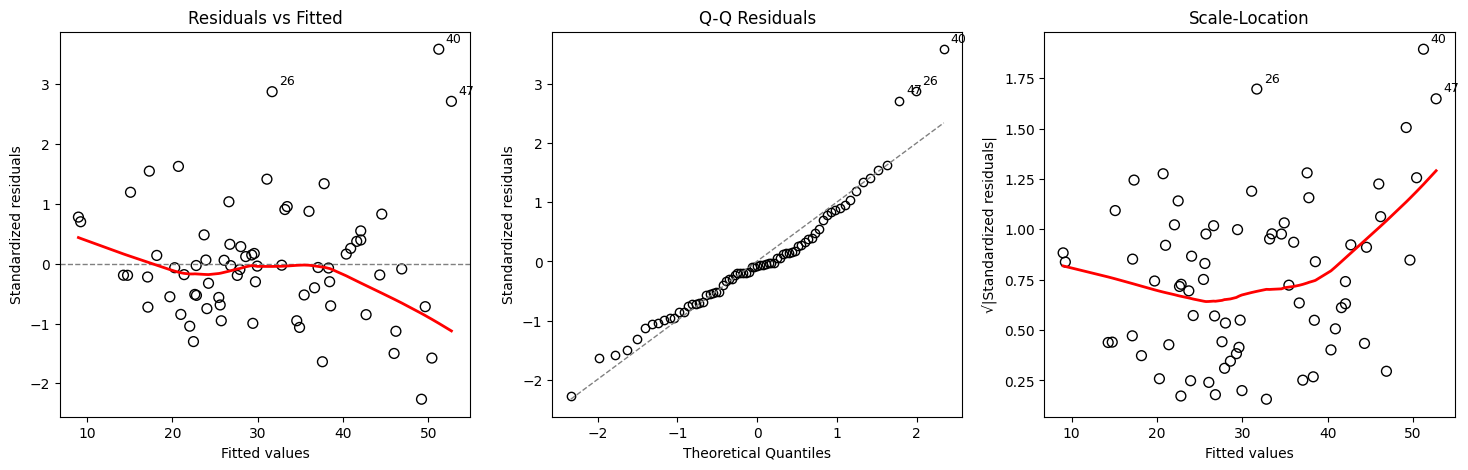

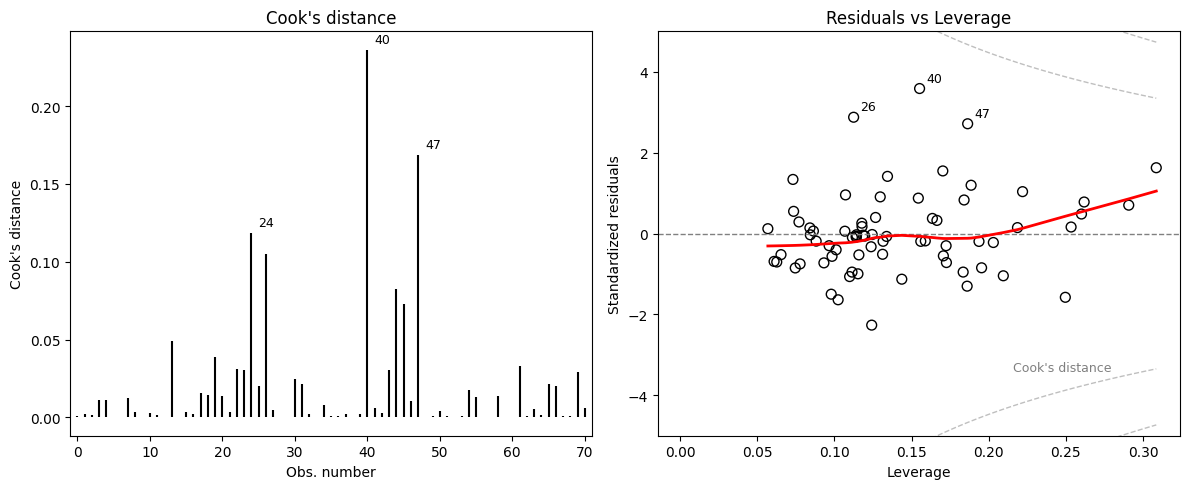

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence



def diagnostic(model=model_full):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig1, axes1 = plt.subplots(1, 2, figsize=(12, 5))
    fitted = model.fittedvalues
    residuals = model.resid
    influence = OLSInfluence(model)

    standardized_resid = influence.resid_studentized_internal
    leverage = influence.hat_matrix_diag
    cooks_d = influence.cooks_distance[0]

    from statsmodels.nonparametric.smoothers_lowess import lowess

    # 1. Residuals vs Fitted
    axes[0].scatter(fitted, standardized_resid, edgecolors='black', facecolors='none', s=50)
    axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)
    lowess_result = lowess(standardized_resid, fitted, frac=0.66)
    axes[0].plot(lowess_result[:, 0], lowess_result[:, 1], color='red', linewidth=2)
    abs_resid = np.abs(standardized_resid)
    top_indices = np.argsort(abs_resid)[-3:][::-1]  
    for idx in top_indices:
        axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[0].set_xlabel('Fitted values')
    axes[0].set_ylabel('Standardized residuals')
    axes[0].set_title('Residuals vs Fitted')

    # 2. Q-Q plot
    from scipy import stats
    standardized_resid_array = np.array(standardized_resid)
    (osm, osr), (slope, intercept, r) = stats.probplot(standardized_resid_array, dist="norm", fit=True)
    axes[1].plot(osm, osr, 'o', markerfacecolor='none', markeredgecolor='black', markersize=6)
    axes[1].plot(osm, slope * osm + intercept, 'gray', linestyle='--', linewidth=1)
    sorted_indices = np.argsort(standardized_resid_array)
    for i, idx in enumerate(top_indices):
        pos = np.where(sorted_indices == idx)[0][0]
        axes[1].annotate(str(idx), (osm[pos], osr[pos]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Standardized residuals')
    axes[1].set_title('Q-Q Residuals')

    # 3. Scale-Location
    sqrt_std_resid = np.sqrt(np.abs(standardized_resid))
    axes[2].scatter(fitted, sqrt_std_resid, edgecolors='black', facecolors='none', s=50)
    lowess_result_sl = lowess(sqrt_std_resid, fitted, frac=0.66)
    axes[2].plot(lowess_result_sl[:, 0], lowess_result_sl[:, 1], color='red', linewidth=2)
    top_indices_sl = np.argsort(sqrt_std_resid)[-3:][::-1]
    for idx in top_indices_sl:
        axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes[2].set_xlabel('Fitted values')
    axes[2].set_ylabel('√|Standardized residuals|')
    axes[2].set_title('Scale-Location')

    plt.tight_layout()

    # 4. Cook's distance
    n = len(cooks_d)
    axes1[0].stem(range(n), cooks_d, linefmt='black', markerfmt=' ', basefmt=' ')
    top_cooks = np.argsort(cooks_d)[-3:][::-1]
    for idx in top_cooks:
        axes1[0].annotate(str(idx), (idx, cooks_d[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes1[0].set_xlabel('Obs. number')
    axes1[0].set_ylabel("Cook's distance")
    axes1[0].set_title("Cook's distance")
    axes1[0].set_xlim(-1, n)

    # 5. Residuals vs Leverage
    axes1[1].scatter(leverage, standardized_resid, edgecolors='black', facecolors='none', s=50)
    axes1[1].axhline(0, color='gray', linestyle='--', linewidth=1)
    lowess_result_lev = lowess(standardized_resid, leverage, frac=0.66)
    axes1[1].plot(lowess_result_lev[:, 0], lowess_result_lev[:, 1], color='red', linewidth=2)
    p = model_full.df_model + 1
    x_lev = np.linspace(0.001, max(leverage), 100)
    for cd_value in [0.5, 1.0]:
        y_upper = np.sqrt(cd_value * p * (1 - x_lev) / x_lev)
        y_lower = -y_upper
        axes1[1].plot(x_lev, y_upper, color='gray', linestyle='--', alpha=0.5, linewidth=1)
        axes1[1].plot(x_lev, y_lower, color='gray', linestyle='--', alpha=0.5, linewidth=1)
    axes1[1].text(max(leverage) * 0.7, min(standardized_resid)*1.5, "Cook's distance", color='gray', fontsize=9)
    for idx in top_indices:
        axes1[1].annotate(str(idx), (leverage[idx], standardized_resid[idx]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    axes1[1].set_xlabel('Leverage')
    axes1[1].set_ylabel('Standardized residuals')
    axes1[1].set_title('Residuals vs Leverage')
    axes1[1].set_ylim(-5,5)
    plt.tight_layout()
    plt.show()

diagnostic(model_full)



OBSERVATIONS:
1. Residuals vs Fitted:
The lowess curve shows a non-linear pattern (curved, not horizontal at 0), and the spread of residuals increases with fitted values, indicating heteroscedasticity (non-constant variance). Points 26, 40, and 47 have very high standardized residuals and appear as outliers that should be investigated.

2. Q-Q Plot:
Points 26, 40, and 47 deviate strongly from the theoretical normal line, particularly in the upper tail. This suggests that the residuals may not follow a normal distribution perfectly, likely due to these outlier observations. The majority of points follow the diagonal line reasonably well, indicating approximate normality for the rest of the data.

3. Scale-Location:
The lowess curve shows an upward trend, confirming heteroscedasticity (the variance of residuals increases with fitted values). Points 26, 40, and 47 have the highest √|standardized residuals|, indicating they are the most extreme observations in terms of residual magnitude.

4. Cook's Distance:
Point 40 has the highest Cook's distance (approximately 0.25), indicating it is the most influential observation. Points 24 and 47 also show elevated Cook's distance values. Using the cutoff of 4/n ≈ 0.056 (where n=71), these three points far exceed this threshold, suggesting they have substantial influence on the regression coefficients.
Note: Point 24 appears in this plot but not in the residual plots, indicating it has moderate residual combined with high leverage, making it influential. Point 26, despite having a large residual, has lower leverage and thus lower Cook's distance than point 24.

5. Residuals vs Leverage:
Point 40 has moderate leverage combined with the highest standardized residual, making it the most influential observation. Points 26 and 47 also have high standardized residuals with moderate leverage, making them influential outliers. All three points fall within the Cook's distance = 0.5 contour, but point 40 is closest to this boundary. The lowess curve shows the general trend of residuals across different leverage values.



### 2.2 Outliers, Leverage, and Influential Observations

In [69]:
influence = OLSInfluence(model_full)
cooks_d = influence.cooks_distance[0]
leverage = influence.hat_matrix_diag
covratio = influence.cov_ratio

n = len(y)
p = model_full.df_model + 1

cooks_cutoff = 4 / n
leverage_cutoff = 2 * p / n
covratio_cutoff = 3 * p / n

print("OUTLIERS, LEVERAGE, AND INFLUENCE DIAGNOSTICS")
print("="*60)
print(f"Sample size: n = {n}")
print(f"Number of parameters: p = {p}")
print(f"\nCutoff values:")
print(f"  Cook's distance: {cooks_cutoff:.4f}")
print(f"  Leverage: {leverage_cutoff:.4f}")
print(f"  CovRatio: {covratio_cutoff:.4f}")

cooks_outliers = np.where(cooks_d > cooks_cutoff)[0]
leverage_outliers = np.where(leverage > leverage_cutoff)[0]
covratio_problems = np.where(np.abs(covratio - 1) > covratio_cutoff)[0]

print(f"\nInfluential points (Cook's D > {cooks_cutoff:.4f}): {cooks_outliers}")
print(f"High leverage points (h > {leverage_cutoff:.4f}): {leverage_outliers}")
print(f"CovRatio problems (|CR-1| > {covratio_cutoff:.4f}): {covratio_problems}")

OUTLIERS, LEVERAGE, AND INFLUENCE DIAGNOSTICS
Sample size: n = 71
Number of parameters: p = 10.0

Cutoff values:
  Cook's distance: 0.0563
  Leverage: 0.2817
  CovRatio: 0.4225

Influential points (Cook's D > 0.0563): [24 26 40 44 45 47]
High leverage points (h > 0.2817): [24 66]
CovRatio problems (|CR-1| > 0.4225): [26 34 35 40 45 47 49 53 64 65 66]


*Observation: According to Cook's distance all those points are influential points [24 26 40 44 45 47] so high leverage and high residuals*

<b><span style="color:red;">Note: important investigate why they are outliers, measure error or ...? </span></b>


### 2.3 Multicollinearity Diagnostics

In [70]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("MULTICOLLINEARITY DIAGNOSTICS")
print("="*60)
print("VIF values (threshold = 10):")
print(vif_data.sort_values('VIF', ascending=False))

corr_matrix = X.corr()
eigenvalues = np.linalg.eigvals(corr_matrix)
condition_number = np.max(eigenvalues) / np.min(eigenvalues)
print(f"\nCondition Number: {condition_number:.2f} (threshold = 100)")

MULTICOLLINEARITY DIAGNOSTICS
VIF values (threshold = 10):
       Variable          VIF
8       anthro4  8205.668770
6      anthro3b  3734.295856
5      anthro3a  2655.261649
7      anthro3c   430.707277
2       hipcirc   412.821926
4   kneebreadth   297.402666
1     waistcirc   196.430437
3  elbowbreadth   161.830170
0           age    17.990074

Condition Number: 981.13 (threshold = 100)


*Observation:
Gros problème de multicolinéarité CN>>100*

### 3) Determine if a transformation of the response or of some of the regressors is necessary.

<b><span style="color:red;">Note: je pense pas avoir parfaitement fait cette partie. Aussi l'interpretation après avoir appliqué transfo pas ouf</span></b>


In [22]:
from scipy.stats import boxcox

# Box-Cox 
y_transformed, lambda_opt = boxcox(y)
print(f"Lambda optimal: {lambda_opt}")
 
# Re-fit 
model_transformed = sm.OLS(y_transformed, X_with_const).fit()
print(model_transformed.summary())

Lambda optimal: 0.4312907445456364
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     104.0
Date:                Sam, 31 jan 2026   Prob (F-statistic):           1.35e-33
Time:                        13:09:57   Log-Likelihood:                -34.013
No. Observations:                  71   AIC:                             88.03
Df Residuals:                      61   BIC:                             110.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

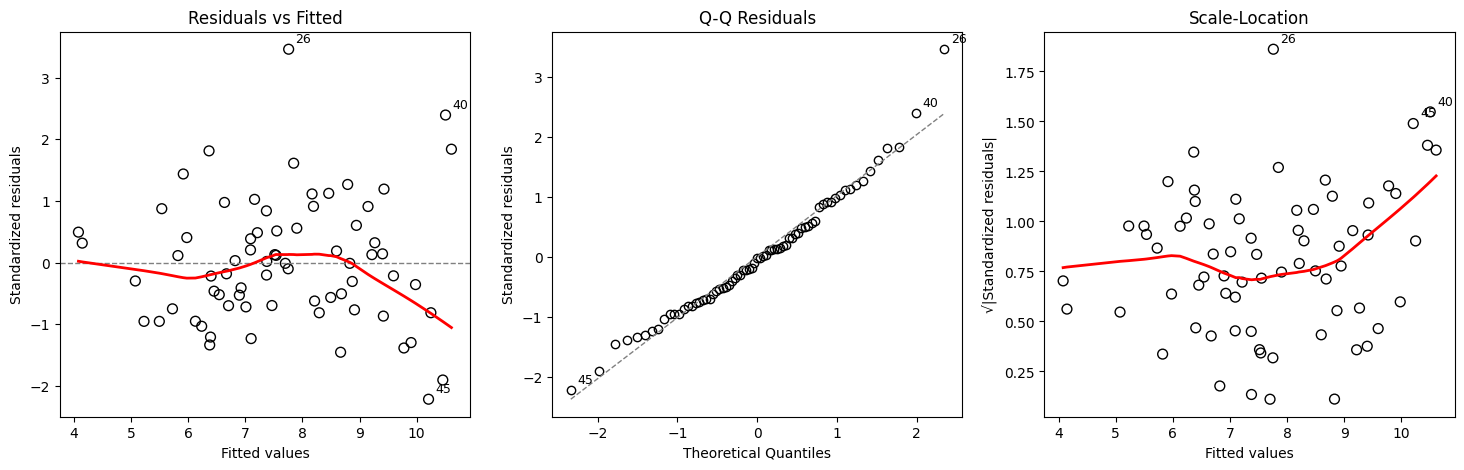

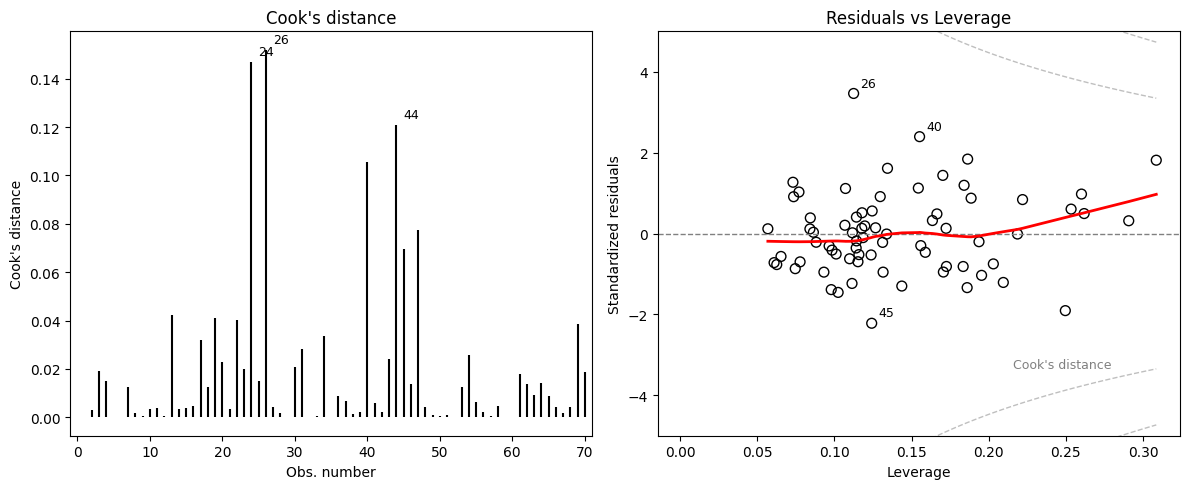

In [71]:
diagnostic(model_transformed)


/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_rf.annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_sl.annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4097641279.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

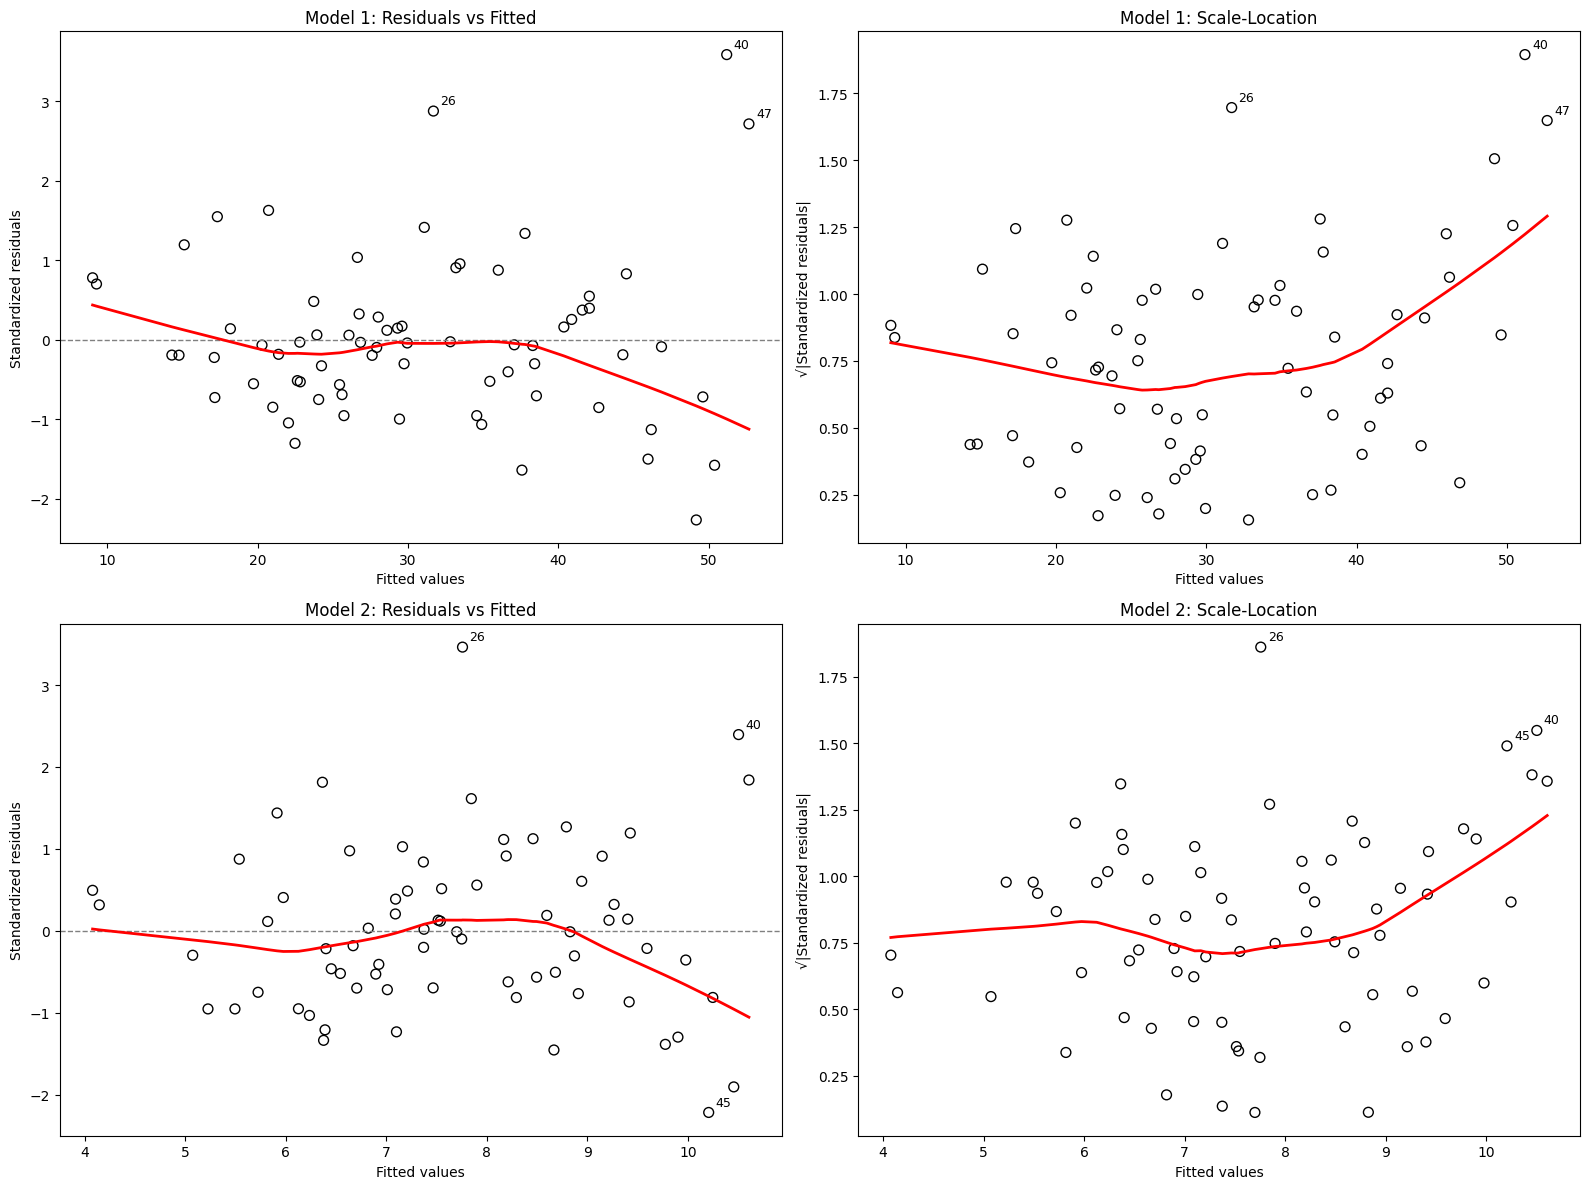

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.nonparametric.smoothers_lowess import lowess

def compare_transfo(model1, model2):
    models = {0: ('Model 1', model1), 1: ('Model 2', model2)}
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    for i, (name, model) in models.items():
        fitted = model.fittedvalues
        influence = OLSInfluence(model)
        standardized_resid = influence.resid_studentized_internal

        ax_rf = axes[i, 0]
        ax_rf.scatter(fitted, standardized_resid, edgecolors='black', facecolors='none', s=50)
        ax_rf.axhline(0, color='gray', linestyle='--', linewidth=1)
        lowess_result = lowess(standardized_resid, fitted, frac=0.66)
        ax_rf.plot(lowess_result[:, 0], lowess_result[:, 1], color='red', linewidth=2)
        abs_resid = np.abs(standardized_resid)
        top_indices = np.argsort(abs_resid)[-3:][::-1]
        for idx in top_indices:
            ax_rf.annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]), 
                           xytext=(5,5), textcoords='offset points', fontsize=9)
        ax_rf.set_xlabel('Fitted values')
        ax_rf.set_ylabel('Standardized residuals')
        ax_rf.set_title(f'{name}: Residuals vs Fitted')

        ax_sl = axes[i, 1]
        sqrt_std_resid = np.sqrt(np.abs(standardized_resid))
        ax_sl.scatter(fitted, sqrt_std_resid, edgecolors='black', facecolors='none', s=50)
        lowess_result_sl = lowess(sqrt_std_resid, fitted, frac=0.66)
        ax_sl.plot(lowess_result_sl[:,0], lowess_result_sl[:,1], color='red', linewidth=2)
        top_indices_sl = np.argsort(sqrt_std_resid)[-3:][::-1]
        for idx in top_indices_sl:
            ax_sl.annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
                           xytext=(5,5), textcoords='offset points', fontsize=9)
        ax_sl.set_xlabel('Fitted values')
        ax_sl.set_ylabel('√|Standardized residuals|')
        ax_sl.set_title(f'{name}: Scale-Location')

    plt.tight_layout()
    plt.show()
compare_transfo(model_full,model_transformed)

<b><span style="color:red;">Note: sûrement mieux de les afficher sur meme graphe ?</span></b>


*The Box-Cox transformation with optimal λ = 0.40 showed mixed results. The transformation successfully reduced heteroscedasticity in the middle range of fitted values, particularly flattening the lowess curve for fitted values below 6 in the Scale-Location plot. However, the presence of extreme outliers (points 24, 26, and 40) overwhelms this improvement. This suggests that while Box-Cox addresses the underlying heteroscedasticity pattern in the bulk of the data, it cannot compensate for individual extreme observations that require separate treatment through removal or robust regression methods.*

### 4) Determine if all possible regressions are feasible.
- If all possible regressions are feasible, perform all possible regressions using
such criteria as Mallow ’ s C p adjusted R 2 , and the PRESS statistic to rank the
best subset models.
- If all possible regressions are not feasible, use stepwise selection techniques
to generate the largest model such that all possible regressions are feasible.
Perform all possible regressions as outlined above.

In [94]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_full_train = sm.add_constant(X_train)
model_full = sm.OLS(y_train, X_full_train).fit()
mse_full = model_full.mse_resid
n_train = len(y_train)

def evaluate_model(X_train, y_train, X_test, y_test, features):
    if len(features) == 0:
        return None
    
    X_train_subset = sm.add_constant(X_train[list(features)])
    X_test_subset = sm.add_constant(X_test[list(features)])
    
    model = sm.OLS(y_train, X_train_subset).fit()
    
    p = len(features) + 1
    
    y_pred = model.predict(X_test_subset)
    mse_test = mean_squared_error(y_test, y_pred)
    
    aic = model.aic
    bic = model.bic
    adj_r2 = model.rsquared_adj
    sse = ((model.fittedvalues - y_train)**2).sum()
    cp = (sse / mse_full) - n_train + 2*p
    
    return {
        'features': features,
        'n_features': len(features),
        'MSE_test': mse_test,
        'AIC': aic,
        'BIC': bic,
        'Adj_R2': adj_r2,
        'Cp': cp
    }

feature_names = X.columns.tolist()
results = []

for k in range(1, len(feature_names)+1):
    for subset in combinations(feature_names, k):
        res = evaluate_model(X_train, y_train, X_test, y_test, subset)
        if res:
            results.append(res)

results_df = pd.DataFrame(results)

results_df['Cp_diff'] = abs(results_df['Cp'] - results_df['n_features'])
top5_cp = results_df.nsmallest(1, 'Cp_diff')
print("Best model according to Mallows Cp:")
print(top5_cp)

top5_aic = results_df.nsmallest(1, 'AIC')
print("\nBestmodel according to AIC:")
print(top5_aic)

top5_bic = results_df.nsmallest(1, 'BIC')
print("\nBest model according to BIC:")
print(top5_bic)

top5_adj_r2 = results_df.nlargest(1, 'Adj_R2')
print("\nBest model according to Adjusted R2:")
print(top5_adj_r2)

top5_mse = results_df.nsmallest(1, 'MSE_test')
print("\nBestmodel according to Test MSE:")
print(top5_mse)


Best model according to Mallows Cp:
                                              features  n_features   MSE_test  \
502  (age, waistcirc, hipcirc, elbowbreadth, kneebr...           8  10.013821   

            AIC        BIC    Adj_R2        Cp   Cp_diff  
502  270.722358  287.74874  0.914262  8.000117  0.000117  

Bestmodel according to AIC:
                                        features  n_features   MSE_test  \
190  (waistcirc, hipcirc, kneebreadth, anthro3a)           4  11.164978   

            AIC        BIC    Adj_R2        Cp   Cp_diff  
190  265.480469  274.93957  0.917544  2.258314  1.741686  

Best model according to BIC:
                            features  n_features   MSE_test         AIC  \
99  (hipcirc, kneebreadth, anthro3a)           3  14.590088  265.750168   

           BIC    Adj_R2        Cp   Cp_diff  
99  273.317449  0.915554  2.214367  0.785633  

Best model according to Adjusted R2:
                                              features  n_features  MSE_


for full regressors:

AIC         BIC   Adj_R2    Cp  
379.412515  402.039313  0.91174  10.0  

Selection of the best models for each criterion:

- Best for Cp:('age', 'waistcirc', 'hipcirc', 'elbowbreadth', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4')

AIC        BIC    Adj_R2        Cp   Cp_diff  
270.722358  287.74874  0.914262  8.000117  0.000117  

- Best for AIC: (waistcirc, hipcirc, kneebreadth, anthro3a)

AIC        BIC    Adj_R2        Cp   Cp_diff  
190  265.480469  274.93957  0.917544  2.258314  1.741686  

- Best for BIC: (hipcirc, kneebreadth, anthro3a)

 BIC    Adj_R2        Cp   Cp_diff  
 273.317449  0.915554  2.214367  0.785633  

- Best for R squared: ('waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4')

 AIC         BIC    Adj_R2        Cp   Cp_diff  
266.88637  280.129112  0.918071  4.130877  1.869123  

- Best for MSE: (waistcirc, elbowbreadth, kneebreadth, anthro3b)

AIC         BIC    Adj_R2         Cp    Cp_diff  
282.696017  292.155118  0.882832  19.626707  15.626707 





*The selection of the best models varies depending on the evaluation criterion. According to Mallows’ Cp, the most balanced model includes eight variables, achieving a Cp very close to the number of parameters, indicating an optimal tradeoff between complexity and bias. The model with the lowest AIC contains four variables, offering a highly parsimonious yet accurate fit, while the BIC favors an even simpler three-variable model, prioritizing simplicity. The model with the highest adjusted R² includes six variables and explains the most variance, although slightly more complex than the Cp-optimal model. Finally, the model with the lowest test MSE, also using four variables, provides the best predictive performance on unseen data but appears overfitted according to Cp. Overall, each criterion highlights a different balance between model complexity, goodness of fit, and predictive accuracy.*

### 5) Compare and contrast the best models recommended by each criterion.

<b><span style="color:red;">Note: A completer. juste comparer AIC,BIC.. etc jsp demander TA</span></b>


### 6) Perform a thorough analysis of the “ best ” models (usually three to fi ve models).


ANALYSIS: Best Cp
Variables: ['age', 'waistcirc', 'hipcirc', 'elbowbreadth', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4']

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     115.4
Date:                Lun, 02 fév 2026   Prob (F-statistic):           2.85e-34
Time:                        13:20:17   Log-Likelihood:                -35.013
No. Observations:                  71   AIC:                             88.03
Df Residuals:                      62   BIC:                             108.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.0

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

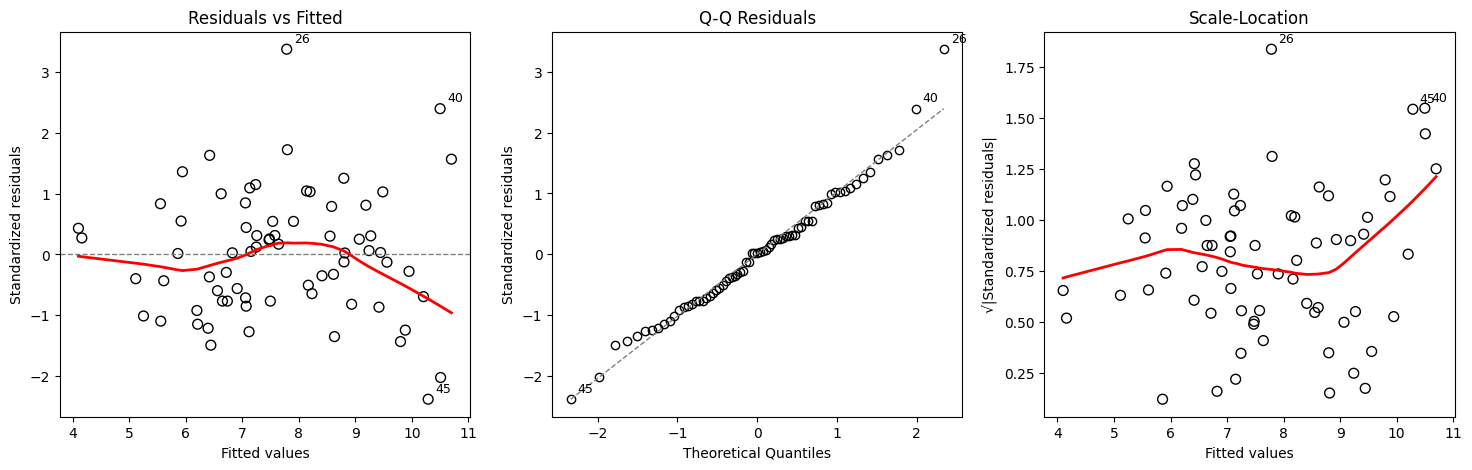

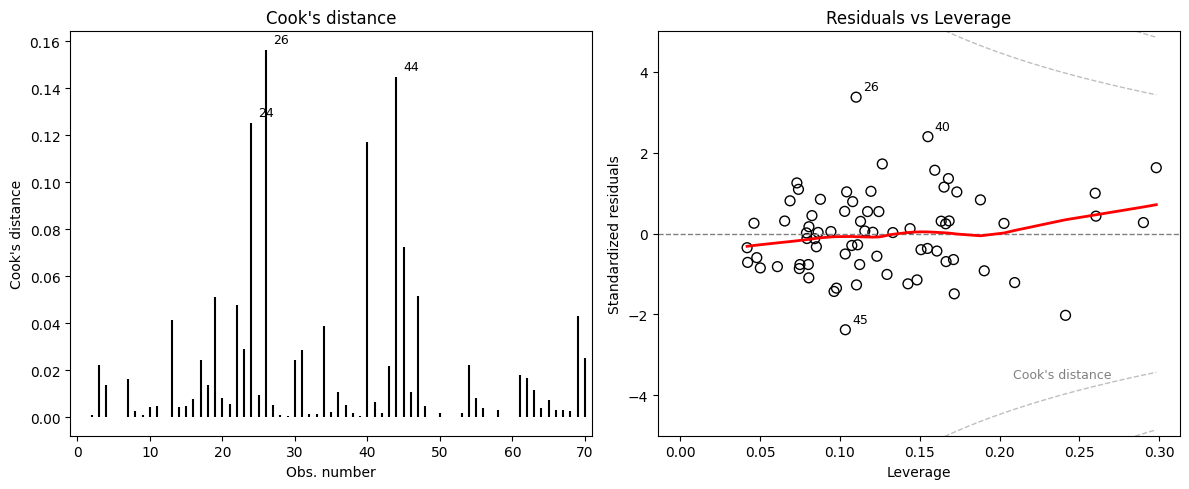


--- MONTGOMERY CRITICAL QUESTIONS ---

1. Are diagnostic checks satisfactory?
   - All VIF < 10: False
   - No Cook's outliers: False

2. Does the model make sense?
   - Variables: ['age', 'waistcirc', 'hipcirc', 'elbowbreadth', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4']
   - All related to body composition: reasonable for BFM prediction

3. Is the model usable?
   - All variables easily measurable: Yes
   - Number of variables: 8 (parsimony)

4. Are coefficients reasonable?
   - Check signs and magnitudes in summary above

5. Multicollinearity resolved?
   - Max VIF: 8202.69 (threshold: 10)

ANALYSIS: Best AIC
Variables: ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a']

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:     

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

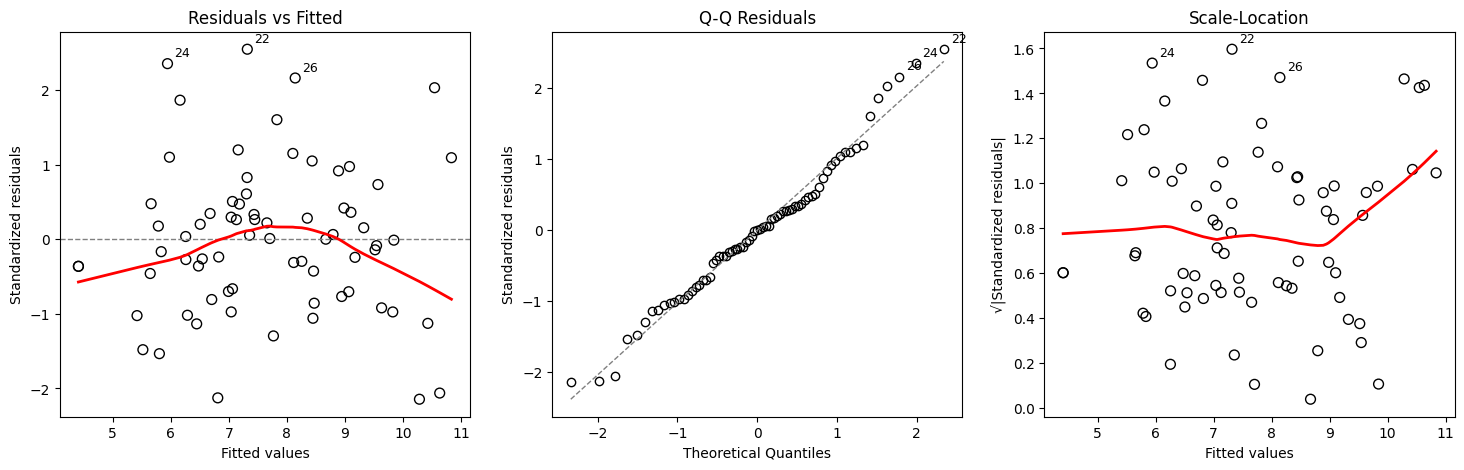

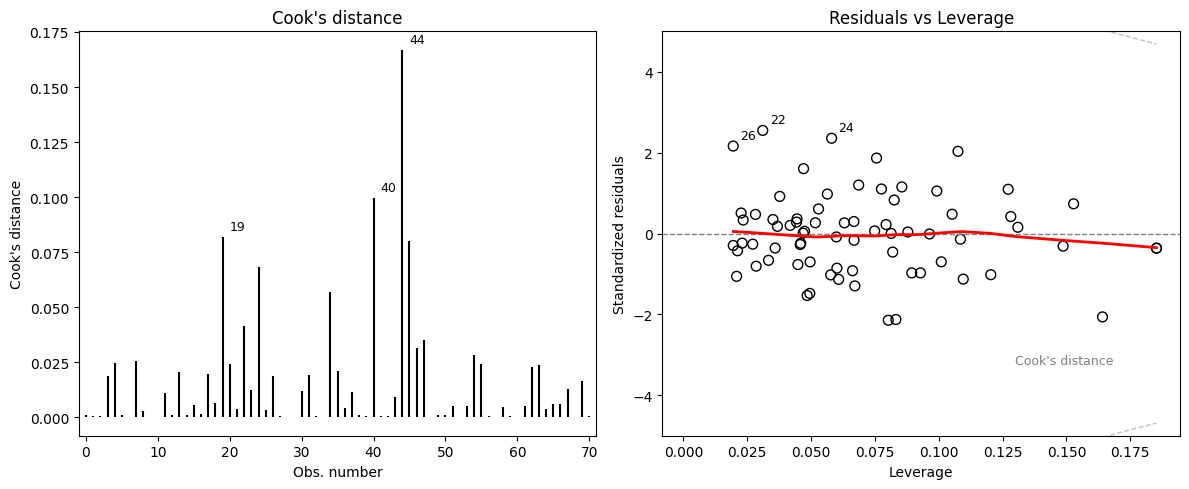


--- MONTGOMERY CRITICAL QUESTIONS ---

1. Are diagnostic checks satisfactory?
   - All VIF < 10: False
   - No Cook's outliers: False

2. Does the model make sense?
   - Variables: ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a']
   - All related to body composition: reasonable for BFM prediction

3. Is the model usable?
   - All variables easily measurable: Yes
   - Number of variables: 4 (parsimony)

4. Are coefficients reasonable?
   - Check signs and magnitudes in summary above

5. Multicollinearity resolved?
   - Max VIF: 379.76 (threshold: 10)

ANALYSIS: Best BIC
Variables: ['hipcirc', 'kneebreadth', 'anthro3a']

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     224.0
Date:                Lun, 02 fév 2026 

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

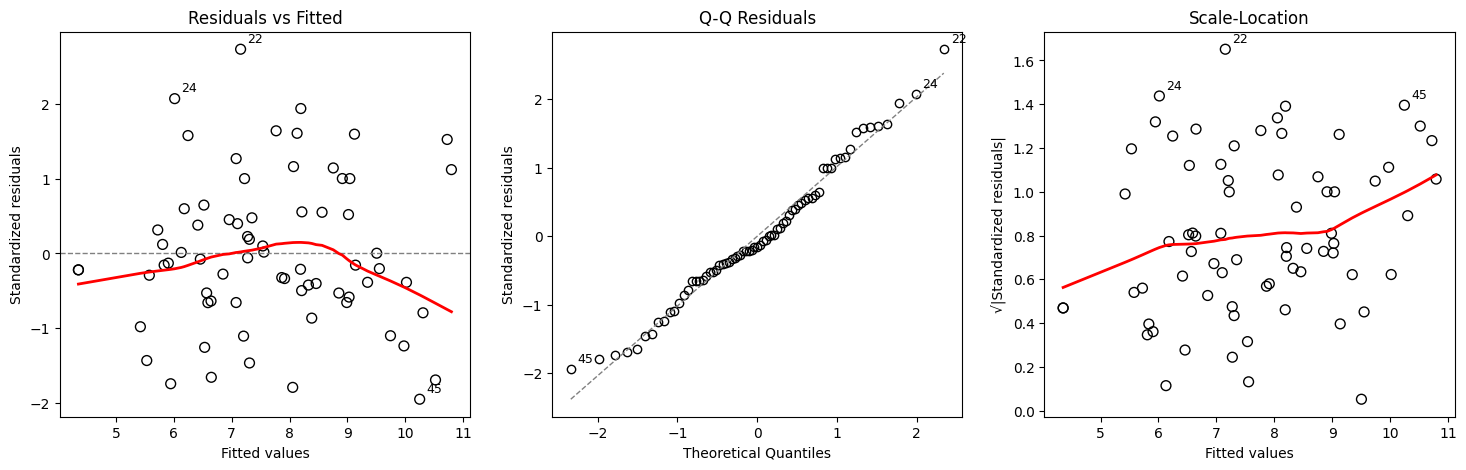

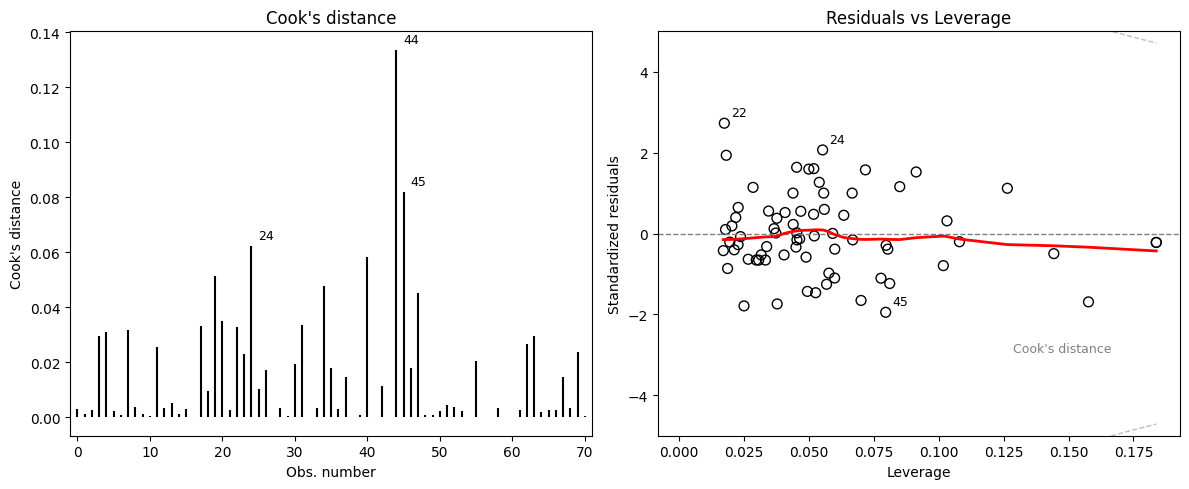


--- MONTGOMERY CRITICAL QUESTIONS ---

1. Are diagnostic checks satisfactory?
   - All VIF < 10: False
   - No Cook's outliers: False

2. Does the model make sense?
   - Variables: ['hipcirc', 'kneebreadth', 'anthro3a']
   - All related to body composition: reasonable for BFM prediction

3. Is the model usable?
   - All variables easily measurable: Yes
   - Number of variables: 3 (parsimony)

4. Are coefficients reasonable?
   - Check signs and magnitudes in summary above

5. Multicollinearity resolved?
   - Max VIF: 289.41 (threshold: 10)

ANALYSIS: Best R²
Variables: ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4']

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     155.3
Date:           

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

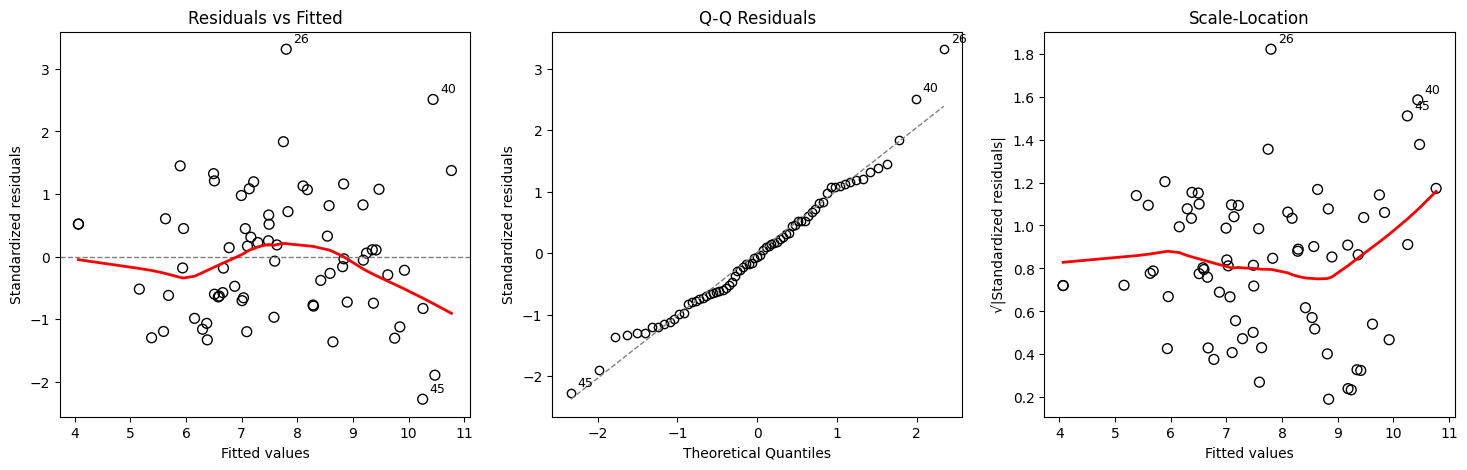

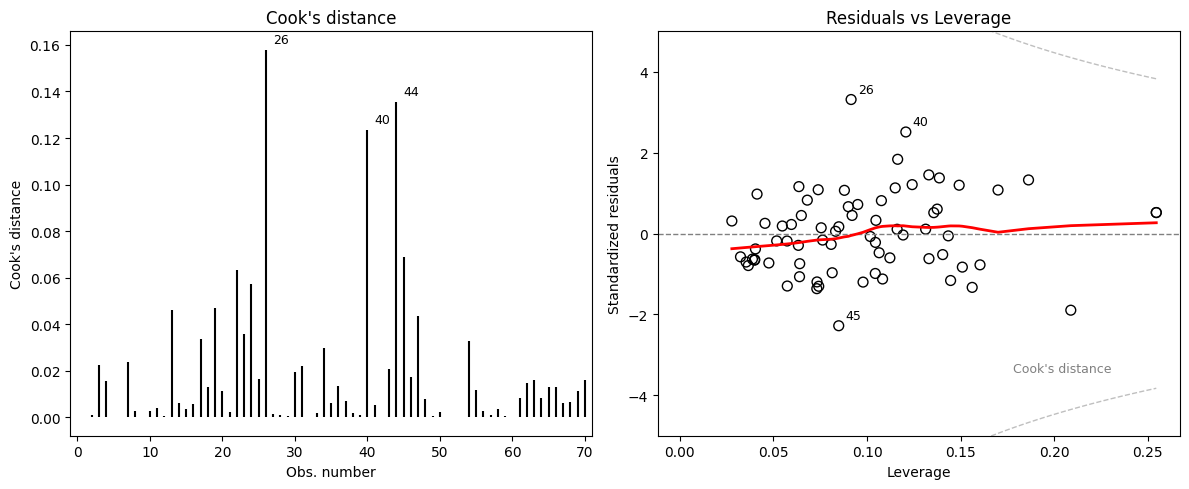


--- MONTGOMERY CRITICAL QUESTIONS ---

1. Are diagnostic checks satisfactory?
   - All VIF < 10: False
   - No Cook's outliers: False

2. Does the model make sense?
   - Variables: ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4']
   - All related to body composition: reasonable for BFM prediction

3. Is the model usable?
   - All variables easily measurable: Yes
   - Number of variables: 6 (parsimony)

4. Are coefficients reasonable?
   - Check signs and magnitudes in summary above

5. Multicollinearity resolved?
   - Max VIF: 8063.05 (threshold: 10)

ANALYSIS: Best MSE
Variables: ['waistcirc', 'elbowbreadth', 'kneebreadth', 'anthro3b']

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     17

/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(str(idx), (fitted.iloc[idx], standardized_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[2].annotate(str(idx), (fitted.iloc[idx], sqrt_std_resid[idx]),
/var/folders/ff/6hp3dqg92056jj3syv25sgg40000gn/T/ipykernel_34587/4043451571.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels 

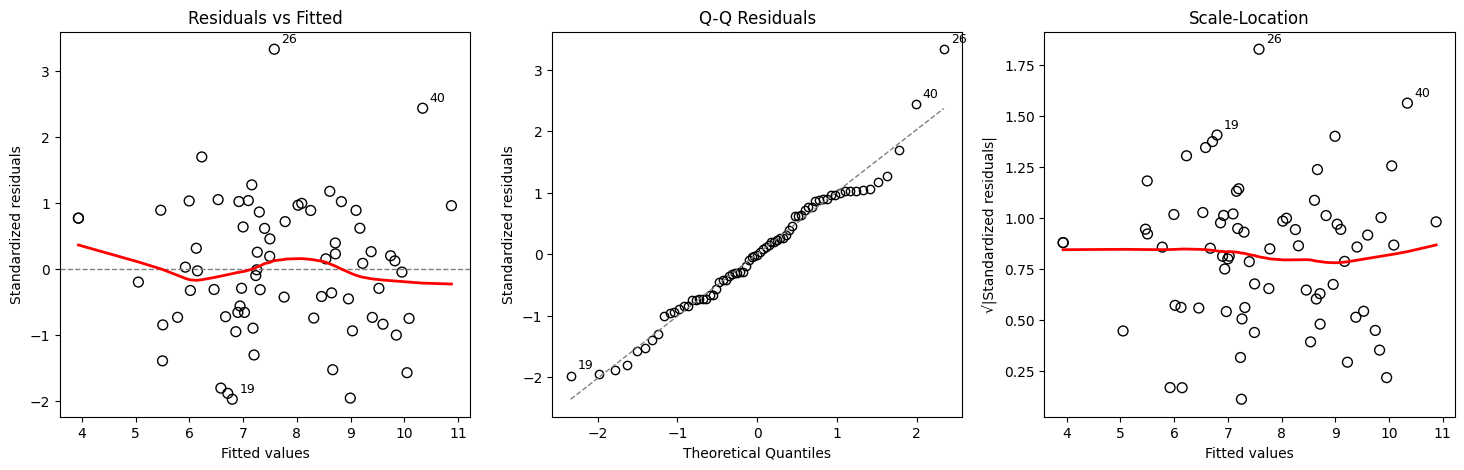

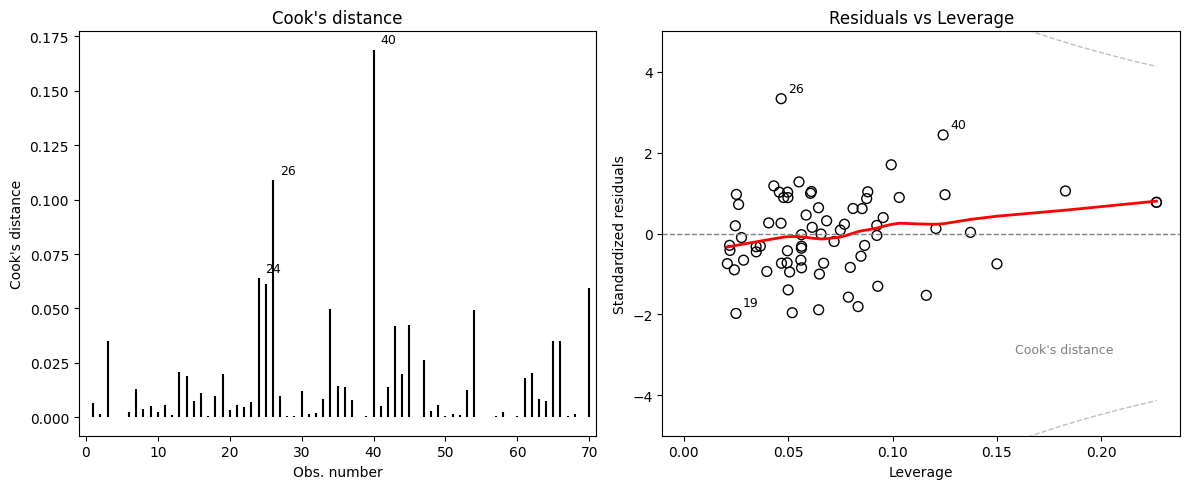


--- MONTGOMERY CRITICAL QUESTIONS ---

1. Are diagnostic checks satisfactory?
   - All VIF < 10: False
   - No Cook's outliers: False

2. Does the model make sense?
   - Variables: ['waistcirc', 'elbowbreadth', 'kneebreadth', 'anthro3b']
   - All related to body composition: reasonable for BFM prediction

3. Is the model usable?
   - All variables easily measurable: Yes
   - Number of variables: 4 (parsimony)

4. Are coefficients reasonable?
   - Check signs and magnitudes in summary above

5. Multicollinearity resolved?
   - Max VIF: 224.62 (threshold: 10)


In [84]:
candidate_models = [
    {
        'name': 'Best Cp',
        'features': ['age', 'waistcirc', 'hipcirc', 'elbowbreadth', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4'],
        'AIC': 270.72, 'BIC': 287.75, 'Adj_R2': 0.914262, 'Cp': 8.00
    },
    {
        'name': 'Best AIC',
        'features': ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a'],
        'AIC': 265.48, 'BIC': 274.94, 'Adj_R2': 0.917544, 'Cp': 2.26
    },
    {
        'name': 'Best BIC',
        'features': ['hipcirc', 'kneebreadth', 'anthro3a'],
        'AIC': None, 'BIC': 273.32, 'Adj_R2': 0.915554, 'Cp': 2.21
    },
    {
        'name': 'Best R²',
        'features': ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a', 'anthro3b', 'anthro4'],
        'AIC': 266.89, 'BIC': 280.13, 'Adj_R2': 0.918071, 'Cp': 4.13
    },
    {
        'name': 'Best MSE',
        'features': ['waistcirc', 'elbowbreadth', 'kneebreadth', 'anthro3b'],
        'AIC': 282.70, 'BIC': 292.16, 'Adj_R2': 0.882832, 'Cp': 19.63
    }
]

for model_info in candidate_models:
    print(f"\n{'='*70}")
    print(f"ANALYSIS: {model_info['name']}")
    print(f"Variables: {model_info['features']}")
    print(f"{'='*70}")
    
    X_subset = X[model_info['features']]
    X_subset_const = sm.add_constant(X_subset)
    y_transformed, lambda_opt = boxcox(y)
    model = sm.OLS(y_transformed, X_subset_const).fit()


    
    print("\nModel Summary:")
    print(model.summary())
    
    print("\n--- DIAGNOSTICS ---")
    
    # 1. VIF
    vif_model = pd.DataFrame()
    vif_model["Variable"] = X_subset.columns
    vif_model["VIF"] = [variance_inflation_factor(X_subset.values, i) 
                        for i in range(X_subset.shape[1])]
    print("\nVIF:")
    print(vif_model)
    
    # 2. Cook's Distance
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]
    n = len(y_transformed)
    p = len(model_info['features']) + 1
    
    cooks_outliers = np.where(cooks_d > 4/n)[0]
    print(f"\nCook's outliers (> {4/n:.4f}): {cooks_outliers}")
    
    # 3. Leverage
    leverage = influence.hat_matrix_diag
    leverage_outliers = np.where(leverage > 2*p/n)[0]
    print(f"High leverage (> {2*p/n:.4f}): {leverage_outliers}")
    
    # 4. CovRatio
    covratio = influence.cov_ratio
    covratio_problems = np.where(np.abs(covratio - 1) > 3*p/n)[0]
    print(f"CovRatio problems (> {3*p/n:.4f}): {len(covratio_problems)} points")
    
    # 5. Residual plots
    diagnostic(model)
    
    print("\n--- MONTGOMERY CRITICAL QUESTIONS ---")
    
    print("\n1. Are diagnostic checks satisfactory?")
    all_vif_ok = (vif_model['VIF'] < 10).all()
    no_cooks_outliers = len(cooks_outliers) == 0
    print(f"   - All VIF < 10: {all_vif_ok}")
    print(f"   - No Cook's outliers: {no_cooks_outliers}")
    
    print("\n2. Does the model make sense?")
    print(f"   - Variables: {model_info['features']}")
    print(f"   - All related to body composition: reasonable for BFM prediction")
    
    print("\n3. Is the model usable?")
    print(f"   - All variables easily measurable: Yes")
    print(f"   - Number of variables: {len(model_info['features'])} (parsimony)")
    
    print("\n4. Are coefficients reasonable?")
    print(f"   - Check signs and magnitudes in summary above")
    
    print("\n5. Multicollinearity resolved?")
    max_vif = vif_model['VIF'].max()
    print(f"   - Max VIF: {max_vif:.2f} (threshold: 10)")

<b><span style="color:red;">Note: expliciter clairement si moins outliers, moins multicolinéarite, et parler plot meilleur modèle? Peut etre aussi superposer graphe</span></b>


Cross Validation 

In [86]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

print("CROSS-VALIDATION COMPARISON")
print(f"{'='*70}\n")

cv_results = []

for model_info in candidate_models:
    X_subset = X[model_info['features']]
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    cv_scores = cross_val_score(
        LinearRegression(), 
        X_subset, 
        y_transformed, 
        cv=kf, 
        scoring='neg_mean_squared_error'
    )
    
    mse_cv = -cv_scores.mean()
    mse_cv_std = cv_scores.std()
    
    cv_results.append({
        'Model': model_info['name'],
        'n_features': len(model_info['features']),
        'MSE_CV': mse_cv,
        'MSE_CV_std': mse_cv_std,
        'AIC': model_info['AIC'],
        'BIC': model_info['BIC'],
        'Adj_R2': model_info['Adj_R2'],
        'Cp': model_info['Cp']
    })
    
    print(f"{model_info['name']}:")
    print(f"  Features: {len(model_info['features'])}")
    print(f"  CV MSE: {mse_cv:.6f} ± {mse_cv_std:.6f}")

cv_results_df = pd.DataFrame(cv_results)
print("\nComparison Table:")
print(cv_results_df)

best_cv_idx = cv_results_df['MSE_CV'].idxmin()
print(f"\nBest model by CV MSE: {cv_results_df.loc[best_cv_idx, 'Model']}")

CROSS-VALIDATION COMPARISON

Best Cp:
  Features: 8
  CV MSE: 0.208268 ± 0.083893
Best AIC:
  Features: 4
  CV MSE: 0.238490 ± 0.077508
Best BIC:
  Features: 3
  CV MSE: 0.272565 ± 0.059012
Best R²:
  Features: 6
  CV MSE: 0.210832 ± 0.077391
Best MSE:
  Features: 4
  CV MSE: 0.251886 ± 0.100585

Comparison Table:
      Model  n_features    MSE_CV  MSE_CV_std     AIC     BIC    Adj_R2     Cp
0   Best Cp           8  0.208268    0.083893  270.72  287.75  0.914262   8.00
1  Best AIC           4  0.238490    0.077508  265.48  274.94  0.917544   2.26
2  Best BIC           3  0.272565    0.059012     NaN  273.32  0.915554   2.21
3   Best R²           6  0.210832    0.077391  266.89  280.13  0.918071   4.13
4  Best MSE           4  0.251886    0.100585  282.70  292.16  0.882832  19.63

Best model by CV MSE: Best Cp


Selection final model

In [97]:
print("\n{'='*70}")
print("FINAL MODEL SELECTION")
print(f"{'='*70}\n")

print("Comparison of top models:")
print("\nModel         | p | Cp      | AIC     | BIC     | Adj_R2  | MSE_CV")
print("-" * 75)
for i, row in cv_results_df.iterrows():
    print(f"{row['Model']:13} | {row['n_features']} | "
          f"{row['Cp']:7.2f} | {row['AIC']:7.2f} | "
          f"{row['BIC']:7.2f} | {row['Adj_R2']:7.5f} | {row['MSE_CV']:.6f}")






{'='*70}
FINAL MODEL SELECTION

Comparison of top models:

Model         | p | Cp      | AIC     | BIC     | Adj_R2  | MSE_CV
---------------------------------------------------------------------------
Best Cp       | 8 |    8.00 |  270.72 |  287.75 | 0.91426 | 0.208268
Best AIC      | 4 |    2.26 |  265.48 |  274.94 | 0.91754 | 0.238490
Best BIC      | 3 |    2.21 |     nan |  273.32 | 0.91555 | 0.272565
Best R²       | 6 |    4.13 |  266.89 |  280.13 | 0.91807 | 0.210832
Best MSE      | 4 |   19.63 |  282.70 |  292.16 | 0.88283 | 0.251886


<b><span style="color:red;">Note: j'ai choisi le meilleure modèle a l'oeil d'apres le tableau je pense pas que ca soit très rigoureux essayer de trouver autre chose </span></b>


In [99]:
final_model_features = ['waistcirc', 'hipcirc', 'kneebreadth', 'anthro3a']  # Best AIC

X_final = X[final_model_features]
X_final_const = sm.add_constant(X_final)
model_final = sm.OLS(y_transformed, X_final_const).fit()

print("FINAL MODEL")
print(f"{'='*70}")
print(model_final.summary())

FINAL MODEL
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     190.6
Date:                Lun, 02 fév 2026   Prob (F-statistic):           1.74e-35
Time:                        13:47:30   Log-Likelihood:                -43.405
No. Observations:                  71   AIC:                             96.81
Df Residuals:                      66   BIC:                             108.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.3252      0.692     

Bootsrap for final model

In [91]:
from sklearn.utils import resample

print("BOOTSTRAP CONFIDENCE INTERVALS")
print(f"{'='*70}\n")

n_iterations = 1000
coefficients = []

X_final_array = X_final.values
y_final_array = y_transformed

for i in range(n_iterations):
    X_boot, y_boot = resample(X_final_array, y_final_array, random_state=i)
    
    X_boot_const = sm.add_constant(pd.DataFrame(X_boot, columns=final_model_features))
    model_boot = sm.OLS(y_boot, X_boot_const).fit()
    coefficients.append(model_boot.params.values)

coefficients = np.array(coefficients)

ci_lower = np.percentile(coefficients, 2.5, axis=0)
ci_upper = np.percentile(coefficients, 97.5, axis=0)

print("95% Bootstrap Confidence Intervals (Percentile Method):")
print("\nVariable          | OLS Estimate | Bootstrap CI")
print("-" * 60)
for i, var in enumerate(['const'] + final_model_features):
    ols_est = model_final.params.iloc[i]
    print(f"{var:17} | {ols_est:12.6f} | [{ci_lower[i]:9.6f}, {ci_upper[i]:9.6f}]")

print("\nComparison with OLS Confidence Intervals:")
print(model_final.conf_int())

print("\nInterpretation:")
print("If bootstrap CIs are similar to OLS CIs: assumptions (normality, etc.) are met")
print("If bootstrap CIs differ significantly: model assumptions may be violated")

BOOTSTRAP CONFIDENCE INTERVALS

95% Bootstrap Confidence Intervals (Percentile Method):

Variable          | OLS Estimate | Bootstrap CI
------------------------------------------------------------
const             |    -6.325168 | [-7.767103, -4.880763]
waistcirc         |     0.026901 | [ 0.011060,  0.042650]
hipcirc           |     0.049023 | [ 0.026785,  0.074059]
kneebreadth       |     0.143207 | [-0.045764,  0.325683]
anthro3a          |     1.335052 | [ 0.983512,  1.634558]

Comparison with OLS Confidence Intervals:
                    0         1
const       -7.706308 -4.944029
waistcirc    0.009098  0.044704
hipcirc      0.026913  0.071133
kneebreadth -0.046977  0.333391
anthro3a     0.974050  1.696054

Interpretation:
If bootstrap CIs are similar to OLS CIs: assumptions (normality, etc.) are met
If bootstrap CIs differ significantly: model assumptions may be violated


<b><span style="color:red;">Note: définir explicitement le meilleur modèle: choix subset choix transfo etc </span></b>


### 7) Explore the need for further transformations.

<b><span style="color:red;">Note: j'ai fait que Box Cox. A faire avant selection best model</span></b>


### 8) Discuss with the subject - matter experts the relative advantages and disadvantages of the final set of models.

<b><span style="color:red;">Note: a faire avant selection best model</span></b>
